<a href="https://colab.research.google.com/github/Manpreet6111/Product-sales-forecasting/blob/main/Product_sales_forecasting_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Liberaries**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

**Reading the dataset**

In [ ]:
df = pd.read_csv("TRAIN.csv")

In [ ]:
df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [ ]:
# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract Year, Month, and Day from the Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [ ]:
df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Year,Month,Day
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,2018,1,1
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,2018,1,1
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,2018,1,1
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,2018,1,1
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,2018,1,1


In [ ]:
df.shape

(188340, 13)

In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Store_id,188340.0,183.0,1.0,92.0,183.0,274.0,365.0,105.366308
Date,188340,2018-09-15 12:00:00.000000256,2018-01-01 00:00:00,2018-05-09 18:00:00,2018-09-15 12:00:00,2019-01-22 06:00:00,2019-05-31 00:00:00,NaN
Holiday,188340.0,0.131783,0.0,0.0,0.0,0.0,1.0,0.338256
#Order,188340.0,68.205692,0.0,48.0,63.0,82.0,371.0,30.467415
Sales,188340.0,42784.327982,0.0,30426.0,39678.0,51909.0,247215.0,18456.708302
Year,188340.0,2018.292636,2018.0,2018.0,2018.0,2019.0,2019.0,0.454974
Month,188340.0,5.498062,1.0,3.0,5.0,8.0,12.0,3.39945
Day,188340.0,15.69186,1.0,8.0,16.0,23.0,31.0,8.783156


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             188340 non-null  object        
 1   Store_id       188340 non-null  int64         
 2   Store_Type     188340 non-null  object        
 3   Location_Type  188340 non-null  object        
 4   Region_Code    188340 non-null  object        
 5   Date           188340 non-null  datetime64[ns]
 6   Holiday        188340 non-null  int64         
 7   Discount       188340 non-null  object        
 8   #Order         188340 non-null  int64         
 9   Sales          188340 non-null  float64       
 10  Year           188340 non-null  int32         
 11  Month          188340 non-null  int32         
 12  Day            188340 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(3), object(5)
memory usage: 16.5+ MB


Dataset Summary:

Total Entries: 21,186 rows Columns: 13

Non-Null Entries: All columns have 21,186 non-null entries, indicating no missing values.

Data Types: Mixed data types including object, int64, int32, float64, and datetime64[ns].

In [ ]:
df.isna().sum()

,0
ID,0
Store_id,0
Store_Type,0
Location_Type,0
Region_Code,0
Date,0
Holiday,0
Discount,0
#Order,0
Sales,0


There are no missing values.

In [ ]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')

Number of duplicate rows: 0


In [ ]:
# Convert 'Discount' column to numeric (1 for 'Yes', 0 for 'No')
df['Discount'] = df['Discount'].map({'Yes': 1, 'No': 0})

# Verify the conversion
print(df['Discount'].head())
print(df['Discount'].unique())

0    1
1    1
2    1
3    1
4    1
Name: Discount, dtype: int64
[1 0]


In [ ]:
df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Year,Month,Day
0,T1000001,1,S1,L3,R1,2018-01-01,1,1,9,7011.84,2018,1,1
1,T1000002,253,S4,L2,R1,2018-01-01,1,1,60,51789.12,2018,1,1
2,T1000003,252,S3,L2,R1,2018-01-01,1,1,42,36868.20,2018,1,1
3,T1000004,251,S2,L3,R1,2018-01-01,1,1,23,19715.16,2018,1,1
4,T1000005,250,S2,L3,R4,2018-01-01,1,1,62,45614.52,2018,1,1


# **Univariate Analysis**

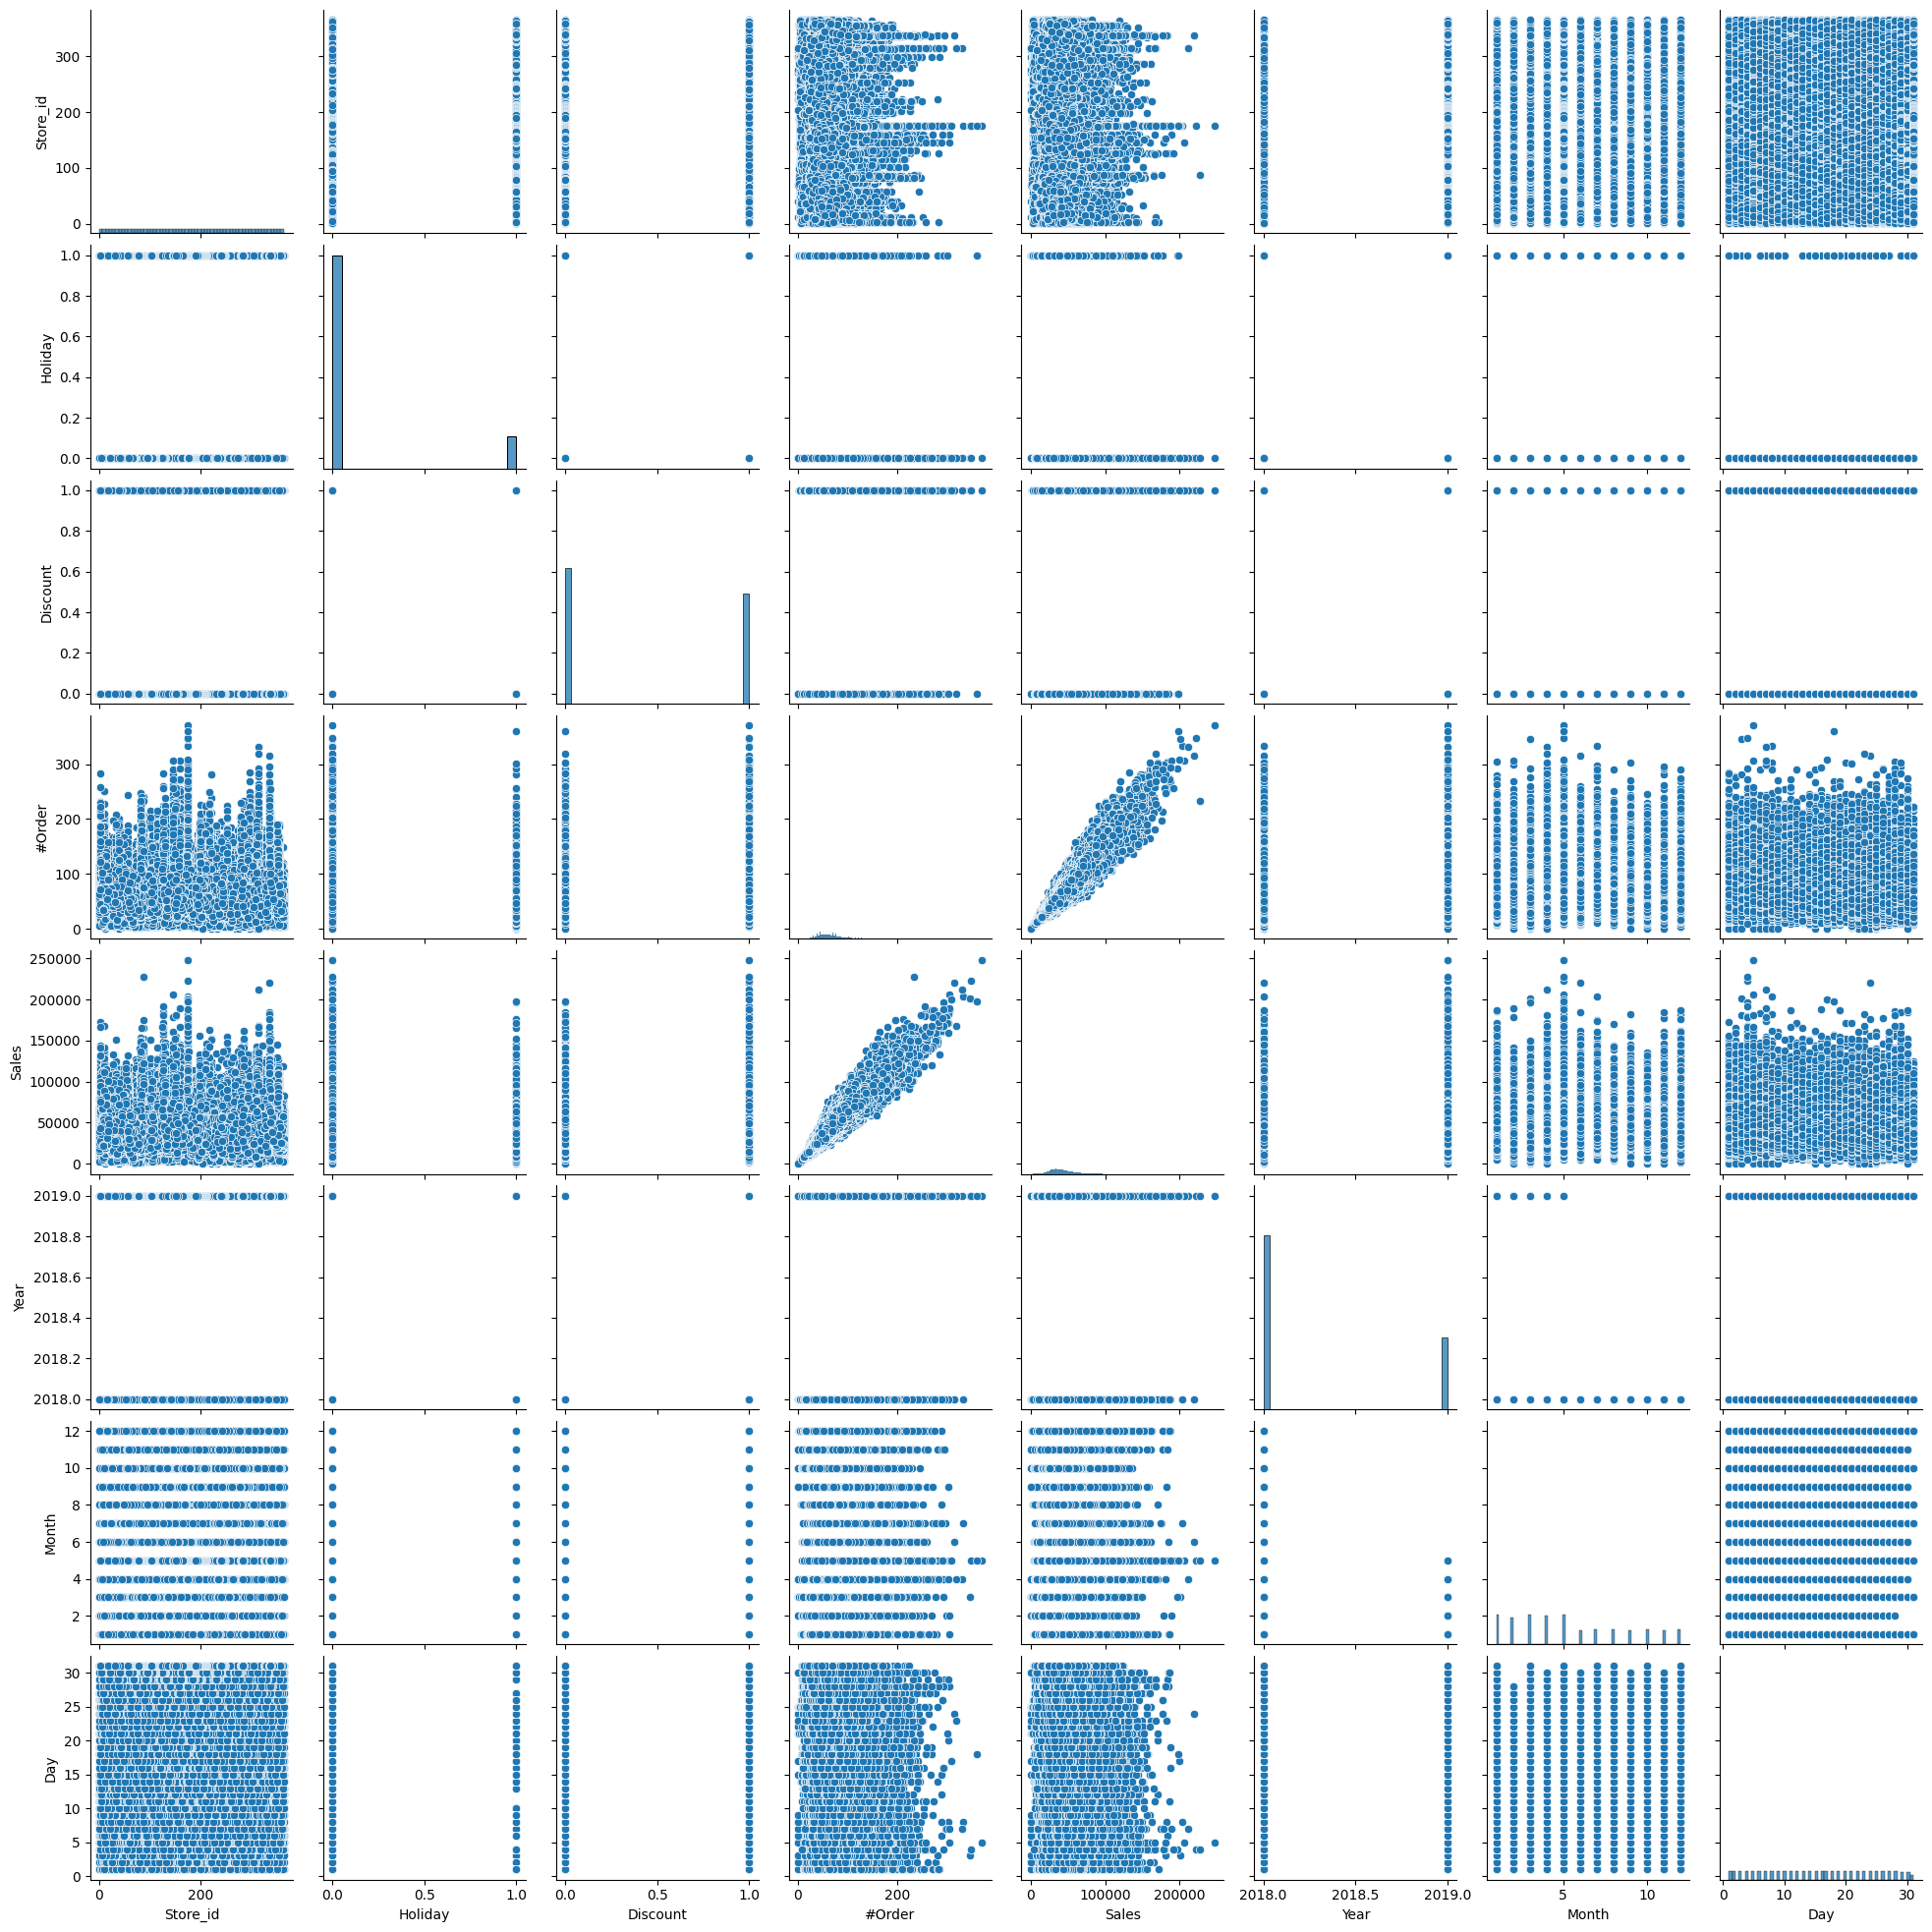

In [ ]:
sns.pairplot(df)
plt.show()

There is positive correlation between sales and orders

**Ploting Histograms for Daily Sales and Number of Orders:**

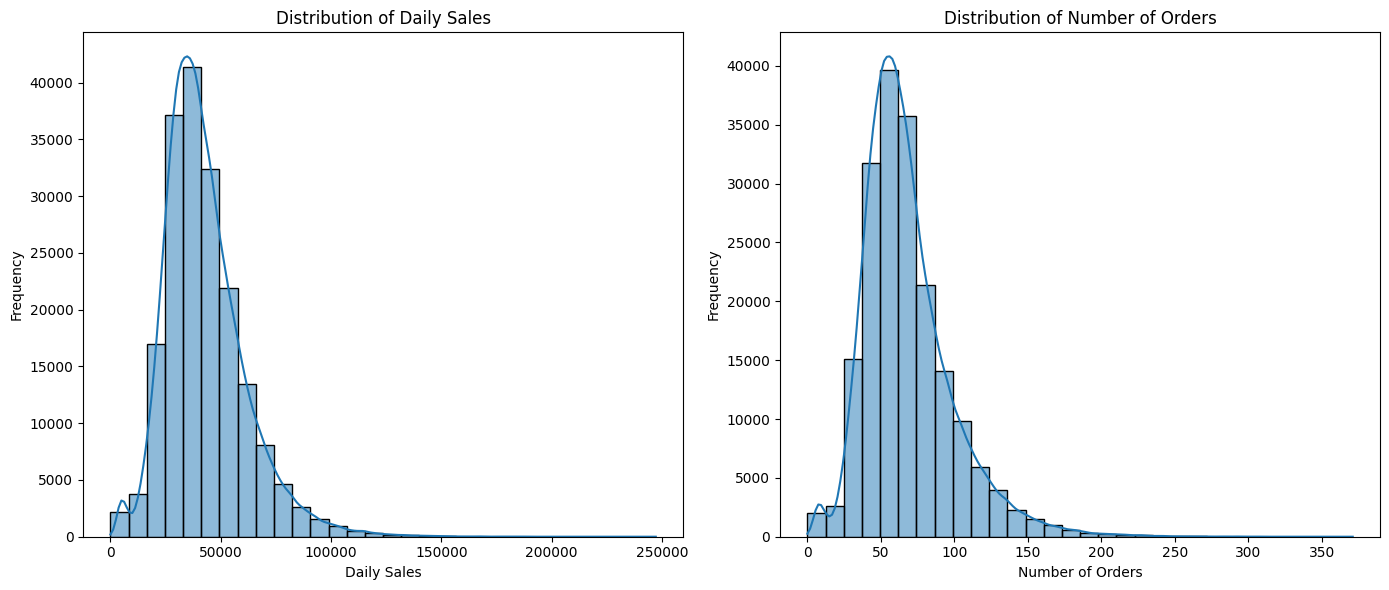

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for daily sales and the number of orders
plt.figure(figsize=(14, 6))

# Histogram for daily sales
plt.subplot(1, 2, 1)
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Distribution of Daily Sales')
plt.xlabel('Daily Sales')
plt.ylabel('Frequency')

# Histogram for number of orders
plt.subplot(1, 2, 2)
sns.histplot(df['#Order'], bins=30, kde=True)
plt.title('Distribution of Number of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

1. The histogram is right-skewed (a long tail to the right), it means that most of the days have lower sales, with a few days having exceptionally high sales.

2. A right-skewed distribution indicates that most days have a lower number of orders, with a few days having a very high number of orders.

3. Bell-shaped curve indicates that sales and no. of orders are evenly distributed around the mean.

# **Bivariate Analysis**

Scatter Plot for Sales vs. Number of Orders:

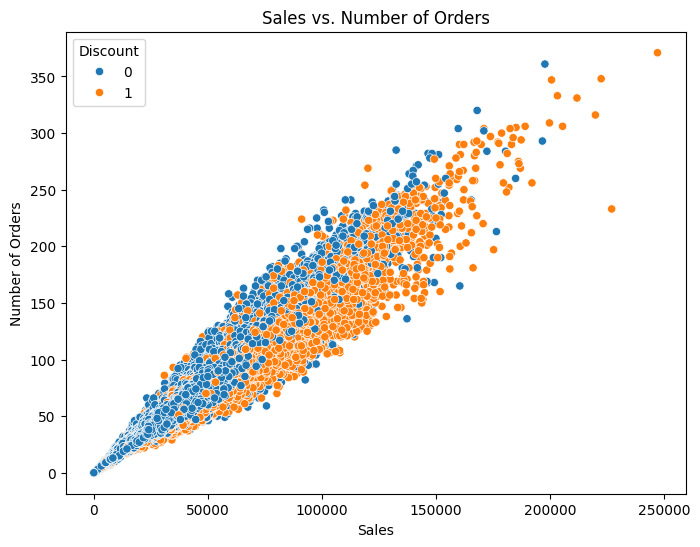

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Sales', y='#Order', hue='Discount')
plt.title('Sales vs. Number of Orders')
plt.xlabel('Sales')
plt.ylabel('Number of Orders')
plt.show()

A positive association between sales and the number of orders, with potential influence from discount promotions.

**Sales vs. Discounts:**

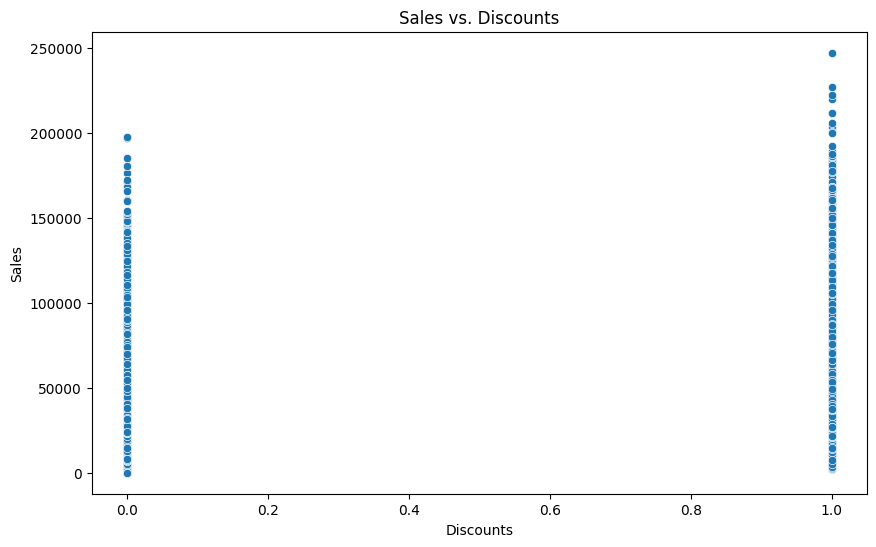

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Sales', data=df)
plt.title('Sales vs. Discounts')
plt.xlabel('Discounts')
plt.ylabel('Sales')
plt.show()

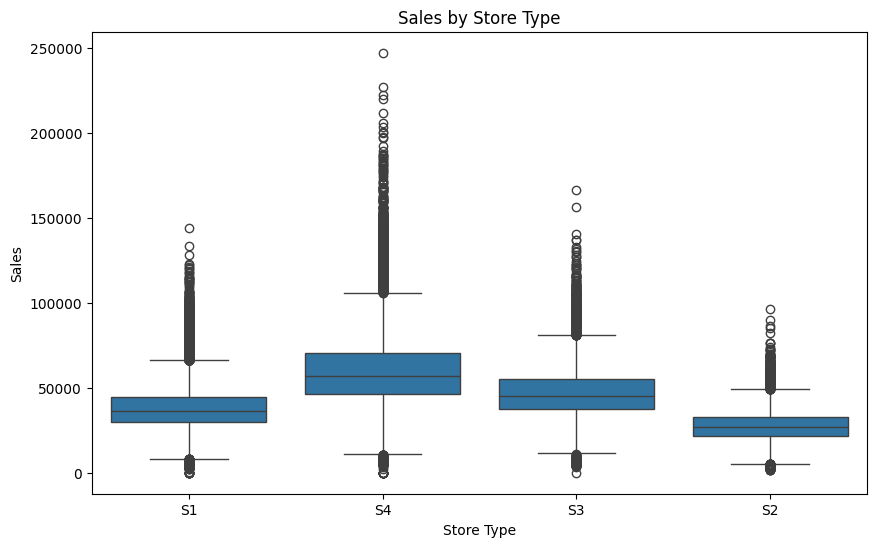

In [ ]:
#  'Store Type' is categorical, using a boxplot to visualize
plt.figure(figsize=(10, 6))
sns.boxplot(x='Store_Type', y='Sales', data=df)
plt.title('Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.show()

1. S1 and S4 stand out as the top-performing store types, generating significantly higher sales compared to the other two. This is evident in the median sales line.

2. S3 occupies the middle ground, with median sales lower than S1 and S4 but higher than S2.

3. There are numerous outliers present in each store type, depicted by the individual dots extending beyond the whiskers. These outliers suggest the presence of unusually high or low sales values compared to the majority of data points.

**Sales vs. Holidays:**

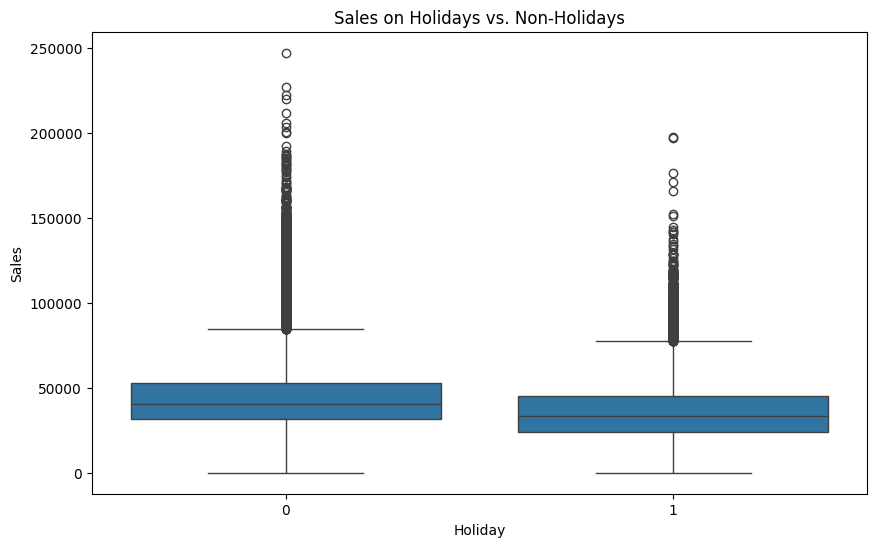

In [ ]:
# Assuming 'Holiday' is a binary variable (0 for non-holiday, 1 for holiday)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Holiday', y='Sales', data=df)
plt.title('Sales on Holidays vs. Non-Holidays')
plt.xlabel('Holiday')
plt.ylabel('Sales')
plt.show()

The median sales value for holidays is significantly higher than that of non-holidays, indicating that overall sales are generally greater on holidays.

# **Correlation Matrix**

Correlation Calculations:

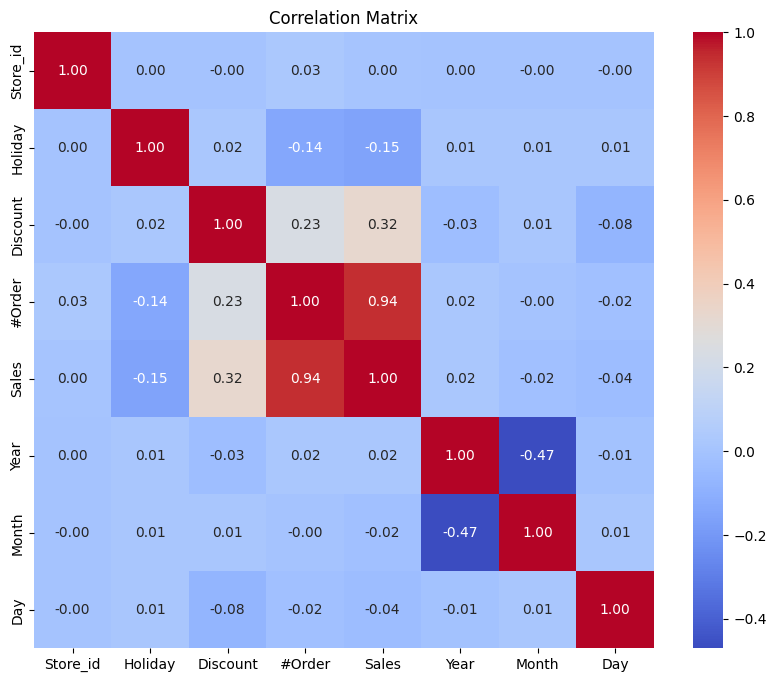

,Store_id,Holiday,Discount,#Order,Sales,Year,Month,Day
Store_id,1.000000e+00,5.380970e-16,-0.000693,0.028290,0.004377,4.924216e-15,-2.816837e-16,-4.550589e-17
Holiday,5.380970e-16,1.000000e+00,0.019545,-0.140496,-0.154779,1.386181e-02,1.370518e-02,1.366827e-02
Discount,-6.928774e-04,1.954527e-02,1.000000,0.233374,0.323906,-3.006382e-02,1.369165e-02,-7.813611e-02
#Order,2.828985e-02,-1.404963e-01,0.233374,1.000000,0.941601,2.285999e-02,-2.863725e-03,-1.795101e-02
Sales,4.376631e-03,-1.547788e-01,0.323906,0.941601,1.000000,1.828431e-02,-1.809195e-02,-3.896935e-02
Year,4.924216e-15,1.386181e-02,-0.030064,0.022860,0.018284,1.000000e+00,-4.701419e-01,-5.078096e-03
Month,-2.816837e-16,1.370518e-02,0.013692,-0.002864,-0.018092,-4.701419e-01,1.000000e+00,1.273428e-02
Day,-4.550589e-17,1.366827e-02,-0.078136,-0.017951,-0.038969,-5.078096e-03,1.273428e-02,1.000000e+00


In [ ]:
# Select relevant columns for correlation analysis
correlation_columns = ['Store_id', 'Holiday', 'Discount', '#Order', 'Sales', 'Year', 'Month', 'Day']
correlation_matrix = df[correlation_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

correlation_matrix

**Holiday:**

1. Positive correlation with Discount (0.162532): This suggests that discounts are more likely to occur during holidays.

2. Negative correlation with #Order (-0.095285) and Sales (-0.096366): This indicates that on holidays, there might be slightly fewer orders and sales compared to non-holiday periods, but the relationship is weak.

**Discount:**

1. Positive correlation with #Order (0.218098) and Sales (0.323963): Discounts are associated with an increase in the number of orders and total sales, indicating that promotional activities are effective in driving sales.
Order:

2. Strong positive correlation with Sales (0.934339): This indicates a very strong relationship between the number of orders and the total sales. More orders naturally lead to higher sales.

3. Weak correlations with other variables, except for Discount and Holiday.
Sales:

4. Strong positive correlation with #Order (0.934339): As noted, this strong correlation signifies that the number of orders is a key driver of total sales.
Moderate positive correlation with Discount (0.323963): Discounts are positively associated with sales, but the effect is less strong than the number of orders.

**Promotions and Discounts:** The presence of discounts has a positive impact on both the number of orders and total sales, though the correlation is stronger with total sales.

**Holidays:** Holidays seem to be associated with a slight decrease in sales and orders, though they are correlated with the occurrence of discounts.

**Sales Drivers:** The number of orders is the strongest driver of total sales, as evidenced by the very high correlation between #Order and Sales.

In [ ]:
df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Year,Month,Day
0,T1000001,1,S1,L3,R1,2018-01-01,1,1,9,7011.84,2018,1,1
1,T1000002,253,S4,L2,R1,2018-01-01,1,1,60,51789.12,2018,1,1
2,T1000003,252,S3,L2,R1,2018-01-01,1,1,42,36868.20,2018,1,1
3,T1000004,251,S2,L3,R1,2018-01-01,1,1,23,19715.16,2018,1,1
4,T1000005,250,S2,L3,R4,2018-01-01,1,1,62,45614.52,2018,1,1


**Analyze sales trends over time to identify seasonality, trends, and cyclic behavior.**

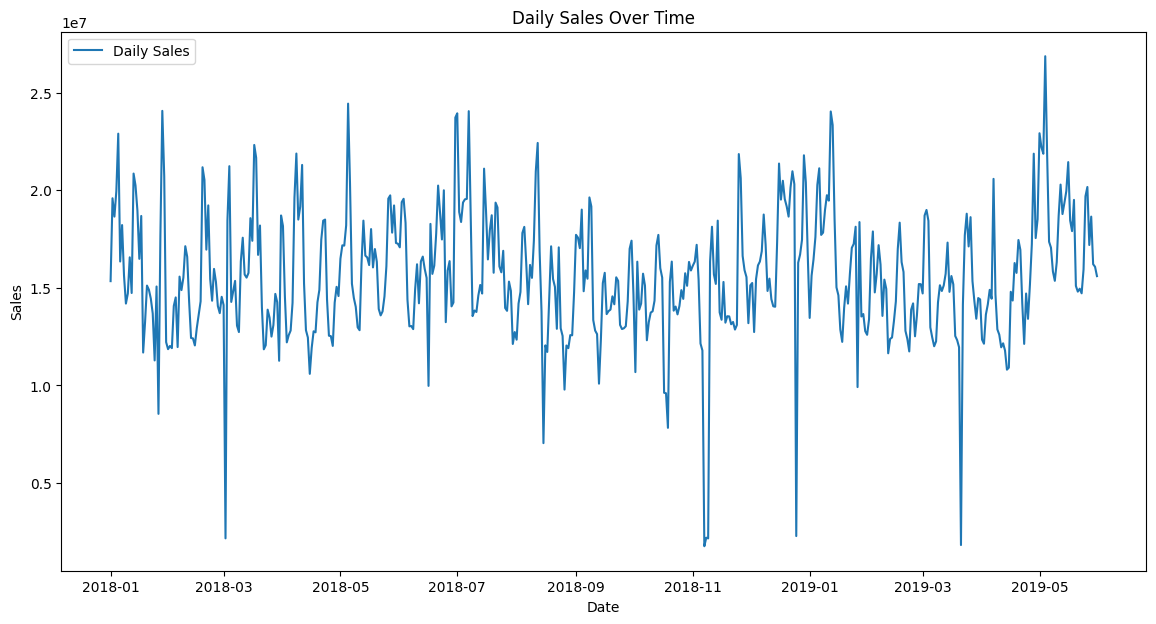

(        Date       Sales
 0 2018-01-01  15345484.5
 1 2018-01-02  19592415.0
 2 2018-01-03  18652527.0
 3 2018-01-04  19956267.0
 4 2018-01-05  22902651.0,
                       Date         Sales
 count                  516  5.160000e+02
 mean   2018-09-15 12:00:00  1.561628e+07
 min    2018-01-01 00:00:00  1.762138e+06
 25%    2018-05-09 18:00:00  1.365264e+07
 50%    2018-09-15 12:00:00  1.533315e+07
 75%    2019-01-22 06:00:00  1.757266e+07
 max    2019-05-31 00:00:00  2.687082e+07
 std                    NaN  3.270532e+06)

In [ ]:
# Aggregate sales data by date
daily_sales = df.groupby('Date')['Sales'].sum().reset_index()

# Plot the time series data
plt.figure(figsize=(14, 7))
plt.plot(daily_sales['Date'], daily_sales['Sales'], label='Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Daily Sales Over Time')
plt.legend()
plt.show()

# Display aggregated data and summary statistics
daily_sales.head(), daily_sales.describe()

Count: 516 days of sales data.

Mean: The average daily sales are approximately 15.62 million.

Standard Deviation: The daily sales fluctuate with a standard deviation of approximately 3.27 million.

Minimum and Maximum: The daily sales range from approximately 1.76 million to 26.87 million.

# **Categorical Data Analysis:**

**Sales Distribution by Location Type**

<ipython-input-22-b60a496e68fd>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Location_Type', y='Sales', data=df, estimator=sum, ci=None)


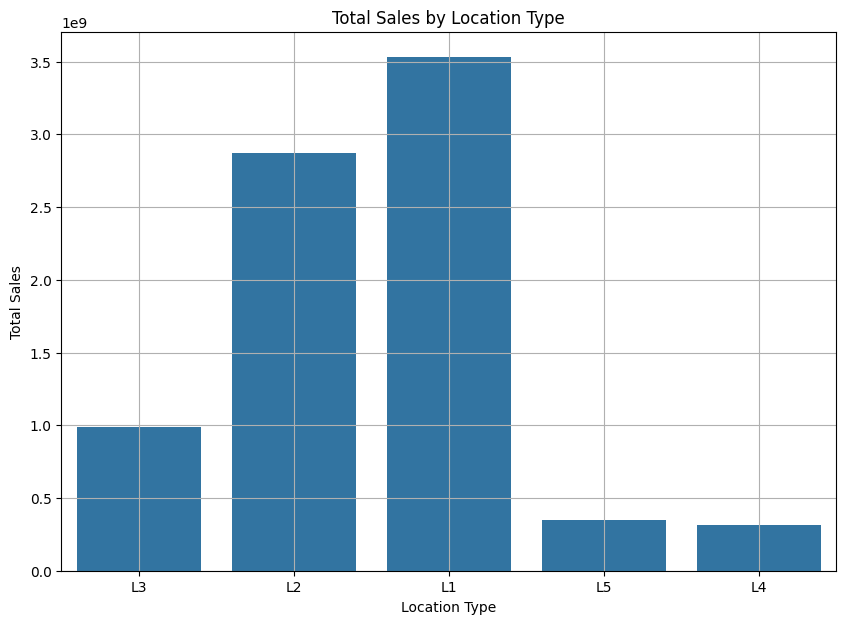

Location_Type
L1    3.529359e+09
L2    2.872964e+09
L3    9.897865e+08
L4    3.149745e+08
L5    3.509163e+08
Name: Sales, dtype: float64


In [ ]:
# Bar chart for Sales distribution by Location Type
plt.figure(figsize=(10, 7))
sns.barplot(x='Location_Type', y='Sales', data=df, estimator=sum, ci=None)
plt.title('Total Sales by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Frequency table for Location Type
location_type_freq = df.groupby('Location_Type')['Sales'].sum()
print(location_type_freq)

Location Type L1 significantly outperforms all other locations

**Sales Distribution by Store Type**

<ipython-input-23-fb029ad43021>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Store_Type', y='Sales', data=df, estimator=sum, ci=None)


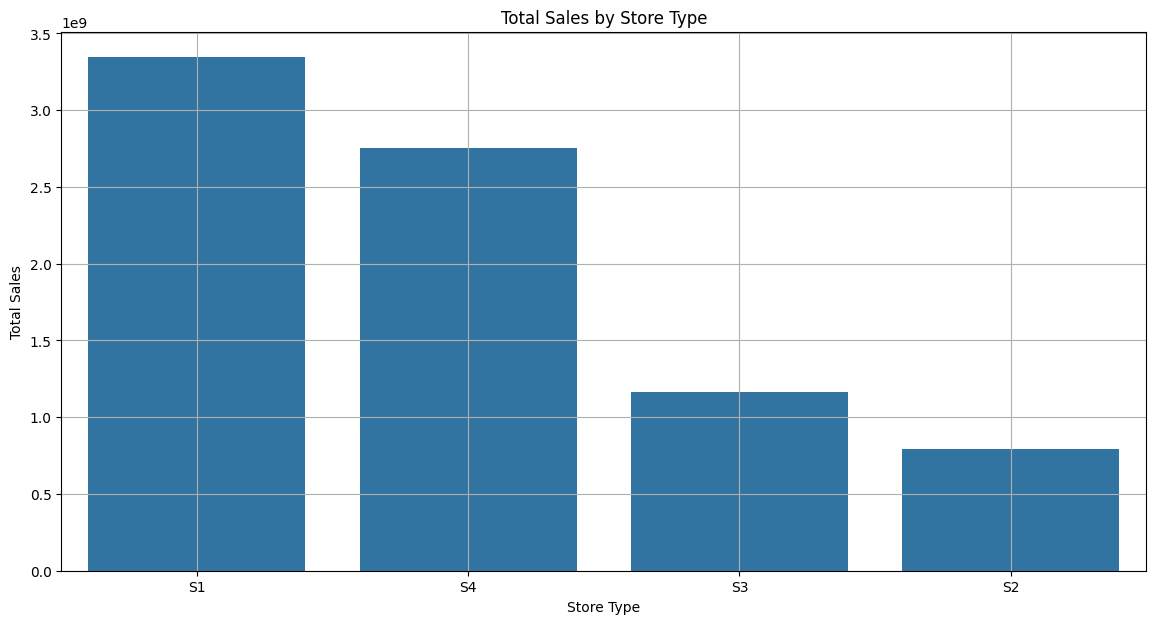

Store_Type
S1    3.343866e+09
S2    7.955308e+08
S3    1.165658e+09
S4    2.752946e+09
Name: Sales, dtype: float64


In [ ]:
# Bar chart for Sales distribution by Store Type
plt.figure(figsize=(14, 7))
sns.barplot(x='Store_Type', y='Sales', data=df, estimator=sum, ci=None)
plt.title('Total Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Frequency table for Store Type
store_type_freq = df.groupby('Store_Type')['Sales'].sum()
print(store_type_freq)

S1 stands out as the top-performing store type, generating significantly higher sales compared to the other three.

**Sales Distribution by Region Code**

<ipython-input-24-9a79529b4a0f>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region_Code', y='Sales', data=df, estimator=sum, ci=None)


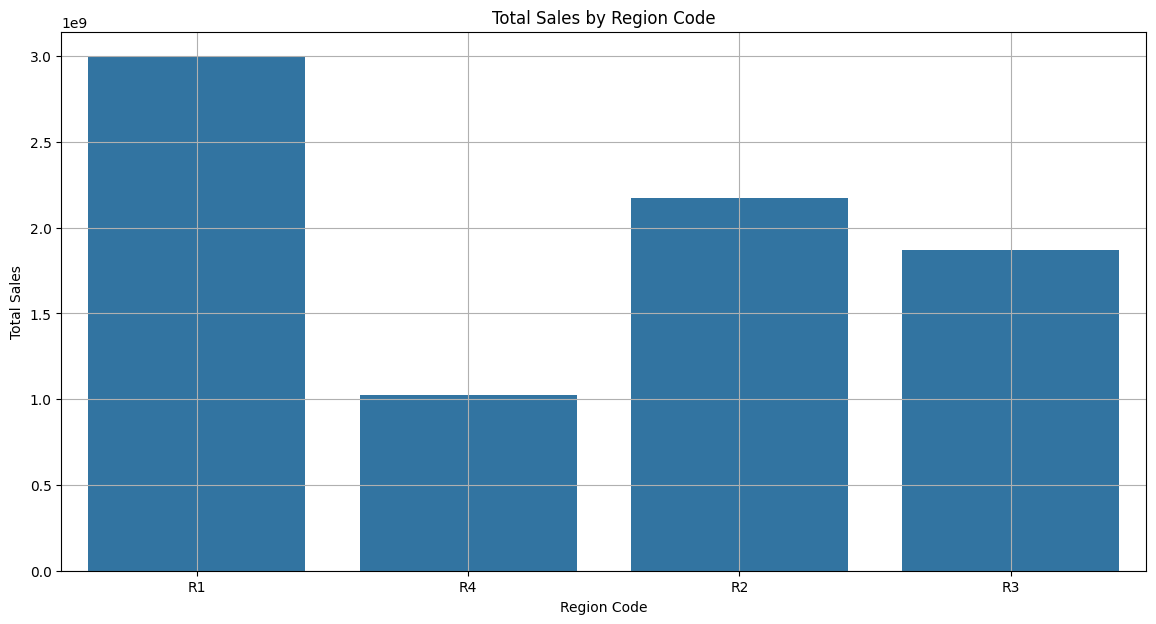

Region_Code
R1    2.992243e+09
R2    2.170172e+09
R3    1.870205e+09
R4    1.025381e+09
Name: Sales, dtype: float64


In [ ]:
# Bar chart for Sales distribution by Region Code
plt.figure(figsize=(14, 7))
sns.barplot(x='Region_Code', y='Sales', data=df, estimator=sum, ci=None)
plt.title('Total Sales by Region Code')
plt.xlabel('Region Code')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Frequency table for Region Code
region_code_freq = df.groupby('Region_Code')['Sales'].sum()
print(region_code_freq)

R1 stands out as the top-performing store type, generating significantly higher sales compared to the other three.

# **Outlier Detection:**

Z-Score Method:

This method identifies outliers by measuring how many standard deviations away a data point is from the mean.

In [ ]:
import pandas as pd
from scipy import stats



# Calculate Z-scores
z_scores = stats.zscore(df[['Sales', 'Discount']])
df_z_scores = pd.DataFrame(z_scores, columns=['Sales_Z', 'Discounts_Z'])

# Define a threshold for outliers (e.g., 3 standard deviations)
threshold = 3
outliers_z = (df_z_scores.abs() > threshold).any(axis=1)

# Filter out outliers
df_no_outliers_z = df[~outliers_z]

IQR Method:

This method detects outliers based on the Interquartile Range (IQR).

In [ ]:
# Calculate IQR for each feature
Q1 = df[['Sales', 'Discount']].quantile(0.25)
Q3 = df[['Sales', 'Discount']].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers (e.g., 1.5 times the IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers_iqr = ((df[['Sales', 'Discount']] < lower_bound) | (df[['Sales', 'Discount']] > upper_bound)).any(axis=1)

# Filter out outliers
df_no_outliers_iqr = df[~outliers_iqr]


Box Plot Method:

Box plots are useful for visualizing the distribution of data and identifying outliers.

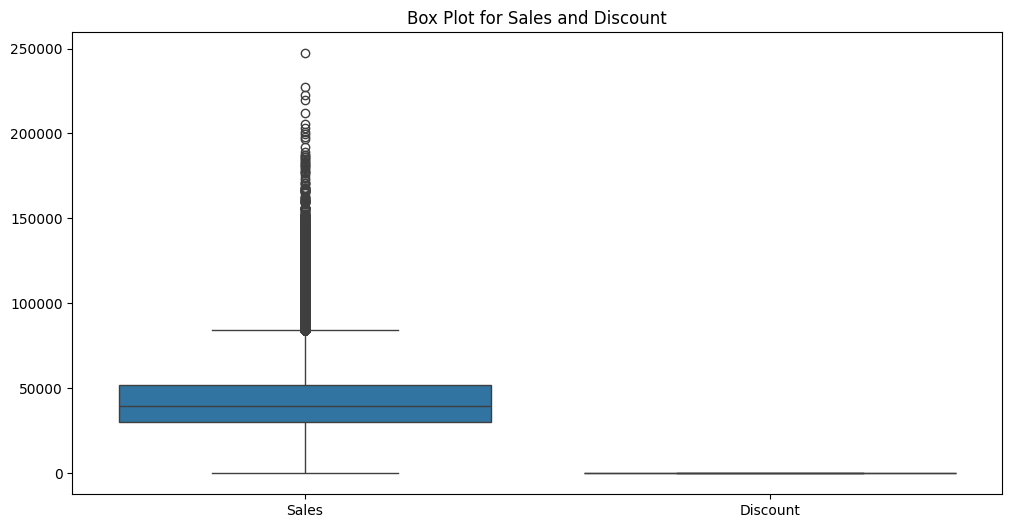

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Sales', 'Discount']])
plt.title('Box Plot for Sales and Discount')
plt.show()

**Handling Outliers**

In [ ]:
df_cleaned = df[~outliers_iqr]  # Using IQR method

Transformation

Apply Log Transformation to reduce the impact of outliers.

In [ ]:
import numpy as np

# Apply log transformation
df['Sales_log'] = np.log1p(df['Sales'])  # log1p handles zero values
df['Discount_log'] = np.log1p(df['Discount'])

Winsorization:

Replace outliers with a capped value.

In [ ]:
from scipy.stats import mstats

# Apply Winsorization
df['Sales_winsorized'] = mstats.winsorize(df['Sales'], limits=[0.05, 0.05])
df['Discount_winsorized'] = mstats.winsorize(df['Discount'], limits=[0.05, 0.05])

Imputation

Replace outliers with a calculated value such as the mean or median.

In [ ]:
# Impute outliers with the median value
median_sales = df['Sales'].median()
df.loc[outliers_iqr, 'Sales'] = median_sales

median_discounts = df['Discount'].median()
df.loc[outliers_iqr, 'Discount'] = median_discounts

In [ ]:
df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Year,Month,Day,Sales_log,Discount_log,Sales_winsorized,Discount_winsorized
0,T1000001,1,S1,L3,R1,2018-01-01,1,1,9,7011.84,2018,1,1,8.855498,0.693147,19191.00,1
1,T1000002,253,S4,L2,R1,2018-01-01,1,1,60,51789.12,2018,1,1,10.854955,0.693147,51789.12,1
2,T1000003,252,S3,L2,R1,2018-01-01,1,1,42,36868.20,2018,1,1,10.515132,0.693147,36868.20,1
3,T1000004,251,S2,L3,R1,2018-01-01,1,1,23,19715.16,2018,1,1,9.889194,0.693147,19715.16,1
4,T1000005,250,S2,L3,R4,2018-01-01,1,1,62,45614.52,2018,1,1,10.728003,0.693147,45614.52,1
